# Context

In this notebook we will do some exploratory data analysis using bivariate and multivariate analysis

# Load packages

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import chi2_contingency
import warnings


warnings.filterwarnings("ignore")

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# Load data

using relative paths

In [43]:
filename = "bivariate_jhonattan.ipynb"  # Current file name
print(f"Current file name: {filename}\n")
print(f"Current absolute path: {os.getcwd()}\n")

# Specify the paths, relative to the current file
ACTUAL_DIR = os.path.dirname(os.path.abspath(filename))
BASE_DIR = os.path.dirname(ACTUAL_DIR)
DATA_DIR = os.path.join(BASE_DIR, "Data")
OUTPUT_DIR = os.path.join(DATA_DIR, "output_data")

print(f"BASE_DIR: {BASE_DIR}")
print(f"DATA_DIR: {DATA_DIR}")
print(f"OUTPUT_DIR: {OUTPUT_DIR}")

Current file name: bivariate_jhonattan.ipynb

Current absolute path: c:\Users\jhona\Dropbox\ASPECTOS MAESTRIA\Retos_maestria\Reto_bancow\Analitica_1\otros_archivos

BASE_DIR: c:\Users\jhona\Dropbox\ASPECTOS MAESTRIA\Retos_maestria\Reto_bancow\Analitica_1
DATA_DIR: c:\Users\jhona\Dropbox\ASPECTOS MAESTRIA\Retos_maestria\Reto_bancow\Analitica_1\Data
OUTPUT_DIR: c:\Users\jhona\Dropbox\ASPECTOS MAESTRIA\Retos_maestria\Reto_bancow\Analitica_1\Data\output_data


In [44]:
df = pd.read_excel(os.path.join(OUTPUT_DIR, "hallazgos_clean.xlsx")).iloc[:, 1:]
df.head(5)

,cliente,analista,tipo_credito,actividad,actividad_v2,monto,cuota,plazo,oficina,zona,regional,distance_to_capital,is_rural,fecha_desembolso,visita_analista_credito,dia_semana_desembolso,dia_mes_desembolso,mes_desembolso,dias_desde_visita_a_desembolso,desembolso_fin_de_semana,desembolso_fin_de_mes,calificacion_cartera,relaciones_laborales,estado,year,tipo,categoria,hallazgo,tipo_hallazgo,riesgo,riesgo_int,riesgo_bin
0,Hector Julio Pabon Castano,AIZ,Renovacion,don_patacon_postobon,otros_servicios_y_negocios,15069268,792642,36,dosquebradas,12,4,10,0,2021-06-11,NaT,4.0,11.0,6.0,NaN,0,0,Si,Si,cancelada,2022,afecta estabilidad,fraude_y_practicas_indebidas,credito otorgado a mas de un titular con el mi...,acto irregular,1 - Alto,1,1
1,Casas Marisol ...,JQQ,Renovacion,expendio_de_comidas_preparadas_en_cafeterias,sector_alimenticio,402000,209228,626,poblado,1,1,5,0,2021-06-15,2021-06-08,1.0,15.0,6.0,7.0,0,0,No,Si,castigo,2022,afecta estabilidad,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,1,1
2,Jennifer Lopez Perez,IOC,Nuevo,drogueria,salud_y_afines,19213296,991582,42,dosquebradas,12,4,10,0,2022-05-03,NaT,1.0,3.0,5.0,NaN,0,0,Si,Si,modificado,2022,afecta estabilidad,fraude_y_practicas_indebidas,negocio no es del solicitante,acto irregular,1 - Alto,1,1
3,Laura Marcela Valdes Zapata,CZL,Renovacion,manualidades_artes_plasticas,oficios_tecnicos_y_manuales,1055378,205648,6,tulua,3,1,100,0,2022-03-11,2022-03-05,4.0,11.0,3.0,6.0,0,0,Si,no_especificado,cancelada,2022,afecta estabilidad,fraude_y_practicas_indebidas,credito otorgado a mas de un titular con el mi...,acto irregular,1 - Alto,1,1
4,Martha Cecilia Veru,AQT,Preferencial,venta_de_mercancia,comercio_y_ventas_general,2481136,170529,24,independencia,1,1,3,0,2022-07-23,2022-07-18,5.0,23.0,7.0,5.0,1,0,Si,Si,normal,2022,afecta estabilidad,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,1,1


# Info about the data

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916 entries, 0 to 2915
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   cliente                         2915 non-null   object        
 1   analista                        2916 non-null   object        
 2   tipo_credito                    2916 non-null   object        
 3   actividad                       2916 non-null   object        
 4   actividad_v2                    2916 non-null   object        
 5   monto                           2916 non-null   int64         
 6   cuota                           2916 non-null   int64         
 7   plazo                           2916 non-null   int64         
 8   oficina                         2916 non-null   object        
 9   zona                            2916 non-null   int64         
 10  regional                        2916 non-null   int64         
 11  dist

The dataset contains information on audits from 2022 to 2024, clients evaluated, offices and placement zones, loan type, loan status, client occupancy, risk level and classification of findings related to financial stability.  

Given that the original data presented errors in several variables, incorrect formats and a high number of null values, a **pre-processing and cleaning of the data was performed prior to the analysis** presented in this workshop.

# Bivariate analysis

--> **IMPORTANT: The main conclusions and key findings are at the end of this notebook.**  
The comments following some analyses or graphs are general observations and thoughts for the continuity of the analyses.

## Justification of the variables selected below:

The selected variables were chosen **based on their potential impact on loan risk assessment and the requirements commented by the bank audit team**. Loan amount, microcredit analyst, loan term, client occupation and office location are key indicators that can help identify patterns in loan **risk levels**.

For the bank, it's highly desired to make a descriptive analysis between the microcredit analysts and offices vs. risk level of the microcredit.

--> First, we will perform some bivariate analysis based on the amount of loans

## monto vs año

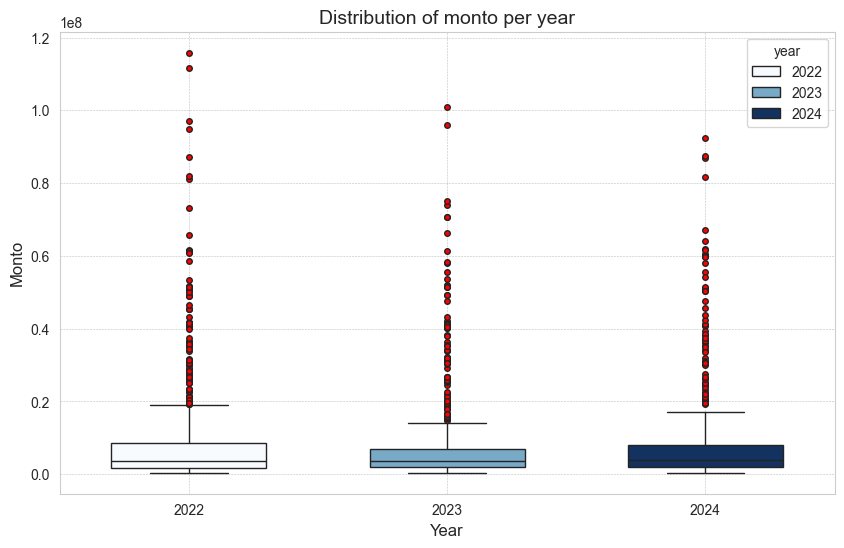

In [46]:
# Boxplot - monto per risk

plt.figure(figsize=(10, 6))
sns.boxplot(
    x=df["year"],
    y=df["monto"],
    palette="Blues",
    linewidth=1,
    width=0.6,
    hue=df["year"],
    flierprops=dict(marker="o", markerfacecolor="red", markersize=4),
)


plt.title("Distribution of monto per year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Monto", fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.4, alpha=0.5)


plt.show()

In [47]:
# Lets check the amount per risk level

df.groupby(by="year").agg(
    {
        "monto": [
            ("#","count"),
            ("min","min"),
            ("Q 10",lambda x: round(x.quantile(q=0.1),3)),
            ("Promedio", "mean"),
            ("Q 90",lambda x: round(x.quantile(q=0.9),3)),
            ("max","max")
        ]
    }
)

monto                                                        
         #     min       Q 10      Promedio        Q 90        max
year                                                              
2022  1285  400000  1011920.0  8.544114e+06  25685800.0  115832618
2023  1023  400000  1424283.4  7.108125e+06  13699954.0  100983196
2024   608  400000   600000.0  8.508897e+06  21094315.2   92506564

--> We can't notice a difference between the loan amounts over the years.

## monto vs riesgo

In [48]:
# outliers monto

# Q1, Q3 & IQR
Q1 = np.percentile(df.monto, 25)  # Q1 (25%)
Q3 = np.percentile(df.monto, 75)  # Q3 (75%)
IQR = Q3 - Q1  # IQR

# Limits for outliers
lower_limit = Q1 - 1.5 * IQR
lower_limit = 0 if lower_limit<0 else lower_limit
upper_limit = Q3 + 1.5 * IQR

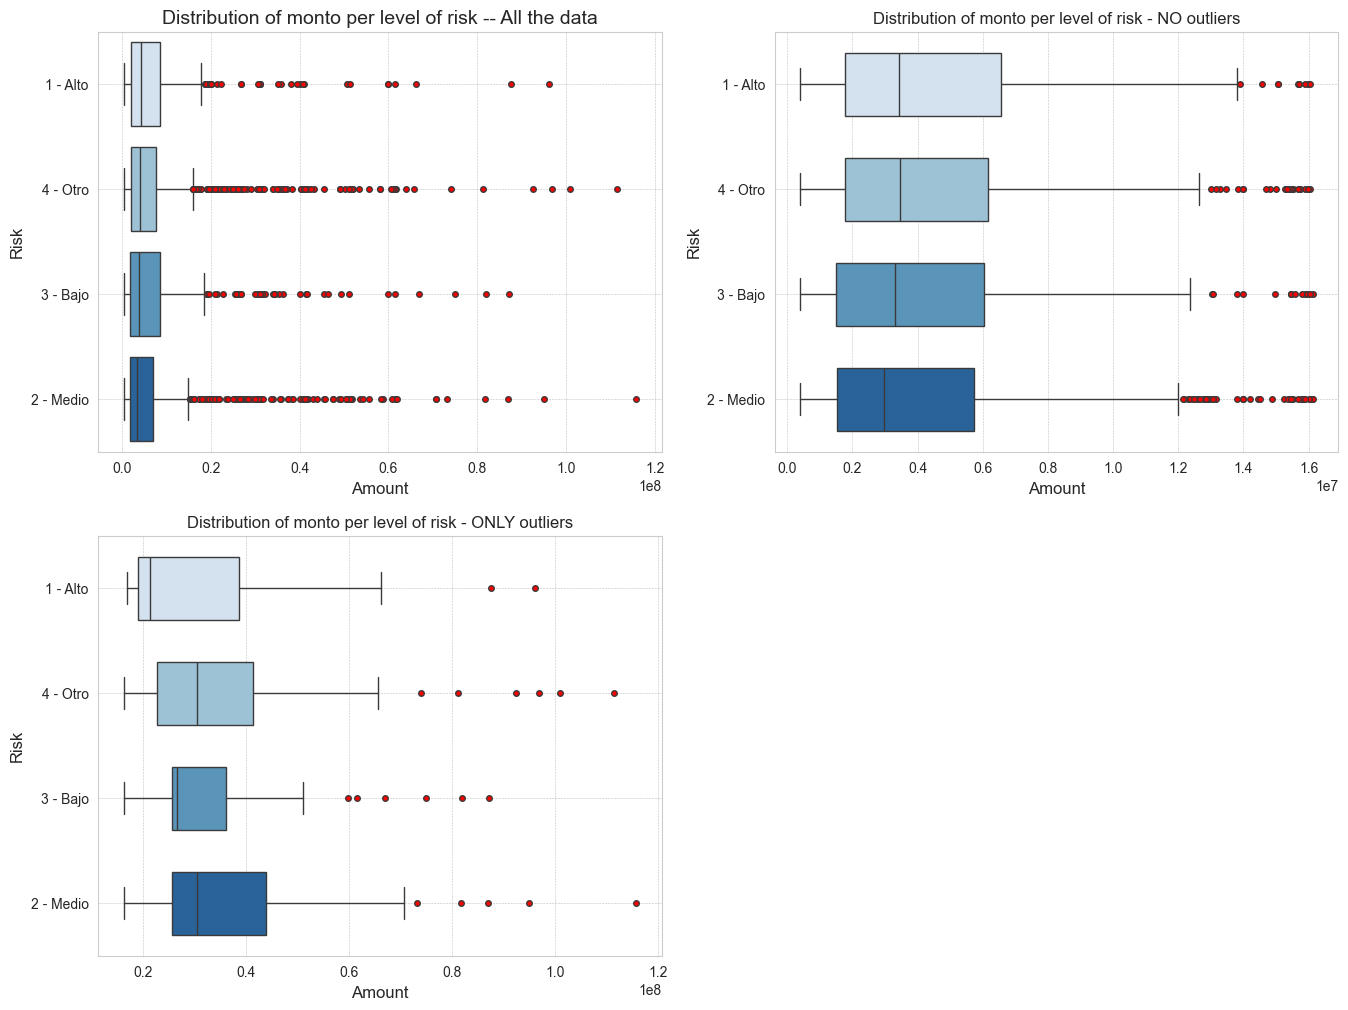

In [49]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
# Boxplot - monto per risk

sns.boxplot(
    y=df["riesgo"],
    x=df["monto"],
    palette="Blues",
    linewidth=1,
    width=0.8,
    hue=df["riesgo"],
    flierprops=dict(marker="o", markerfacecolor="red", markersize=4),
)


plt.title("Distribution of monto per level of risk -- All the data", fontsize=14)
plt.xlabel("Amount", fontsize=12)
plt.ylabel("Risk", fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.4, alpha=0.5)


# plt.legend().remove()


plt.subplot(2, 2, 2)

# Boxplot - monto per risk WITHOUT OUTLIERS
temp = df[df["monto"] < upper_limit]

sns.boxplot(
    x=temp["monto"],
    y=temp["riesgo"],
    palette="Blues",
    linewidth=1,
    width=0.6,
    hue=temp["riesgo"],
    flierprops=dict(marker="o", markerfacecolor="red", markersize=4),
)

plt.title("Distribution of monto per level of risk - NO outliers", fontsize=12)
plt.xlabel("Amount", fontsize=12)
plt.ylabel("Risk", fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.4, alpha=0.5)


plt.subplot(2, 2, 3)

# Boxplot - monto per risk ONLY OUTLIERS
temp = df[df["monto"] > upper_limit]

sns.boxplot(
    x=temp["monto"],
    y=temp["riesgo"],
    palette="Blues",
    linewidth=1,
    width=0.6,
    hue=temp["riesgo"],
    flierprops=dict(marker="o", markerfacecolor="red", markersize=4),
)

plt.title("Distribution of monto per level of risk - ONLY outliers", fontsize=12)
plt.xlabel("Amount", fontsize=12)
plt.ylabel("Risk", fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.4, alpha=0.5)


plt.show()

--> We can notice differences between the loan amounts distribution per risk level, separating the data according to the outliers of loan amount.

## monto vs actividad

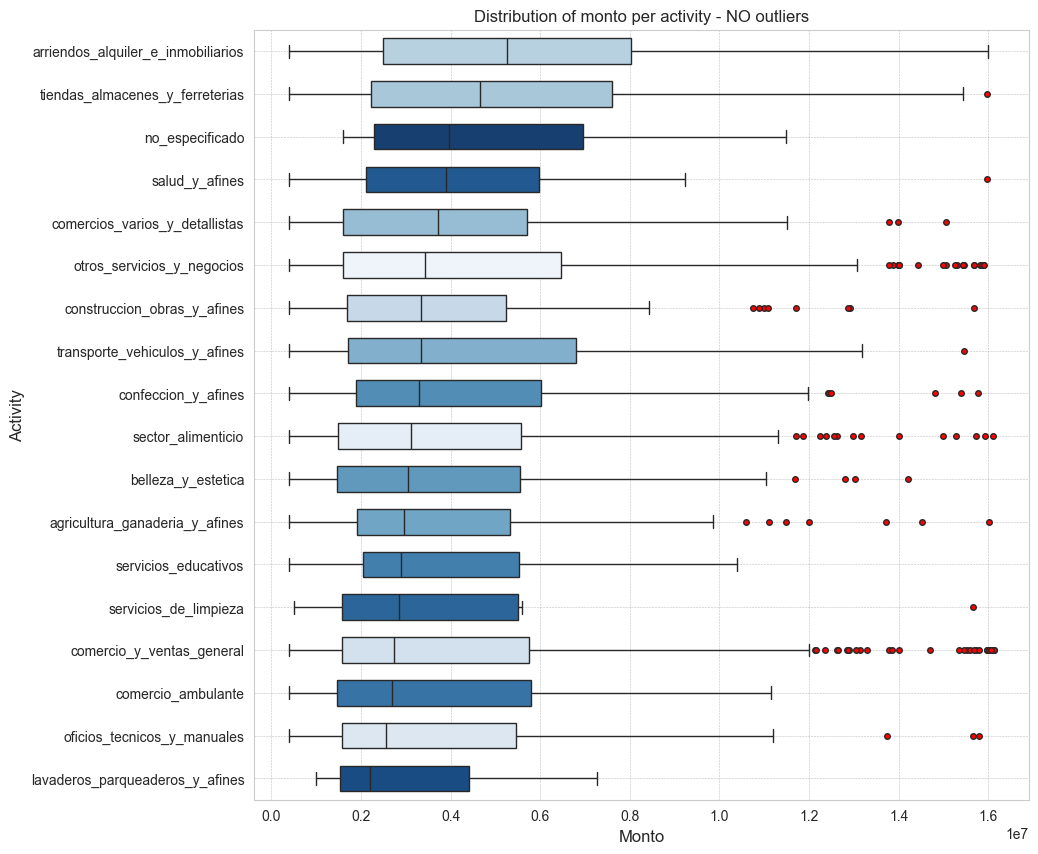

In [50]:
# Boxplot - monto per activity WITHOUT OUTLIERS

temp = df[df["monto"] < upper_limit]

order = (
    temp.groupby("actividad_v2")["monto"].median().sort_values(ascending=False).index
)

plt.figure(figsize=(10, 10))
sns.boxplot(
    x=temp["monto"],
    y=temp["actividad_v2"],
    order=order,
    palette="Blues",
    linewidth=1,
    width=0.6,
    hue=temp["actividad_v2"],
    flierprops=dict(marker="o", markerfacecolor="red", markersize=4),
)

plt.title("Distribution of monto per activity - NO outliers", fontsize=12)
plt.xlabel("Monto", fontsize=12)
plt.ylabel("Activity", fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.4, alpha=0.5)

plt.show()

--> We can observe differences between the distribution of loan amounts by microcredit client occupancy when we eliminate loan amount outliers.

--> now, it is of interest to analyze the relationship between the risk levels and the different types of occupation.

## actividad vs riesgo

In [51]:
print("Frequency of audit´s risk per activity:\n")

cross_tab = pd.crosstab(df.actividad_v2, df.riesgo, margins=True).sort_values(
    by="All", ascending=False
)
cross_tab

Frequency of audit´s risk per activity:



riesgo,1 - Alto,2 - Medio,3 - Bajo,4 - Otro,All
actividad_v2,,,,,
All,325,1084,423,1084,2916
comercio_y_ventas_general,70,224,100,199,593
otros_servicios_y_negocios,59,198,70,162,489
sector_alimenticio,37,155,67,150,409
tiendas_almacenes_y_ferreterias,22,73,37,70,202
oficios_tecnicos_y_manuales,26,68,22,72,188
agricultura_ganaderia_y_afines,25,74,15,71,185
belleza_y_estetica,18,61,20,59,158
confeccion_y_afines,12,46,27,55,140


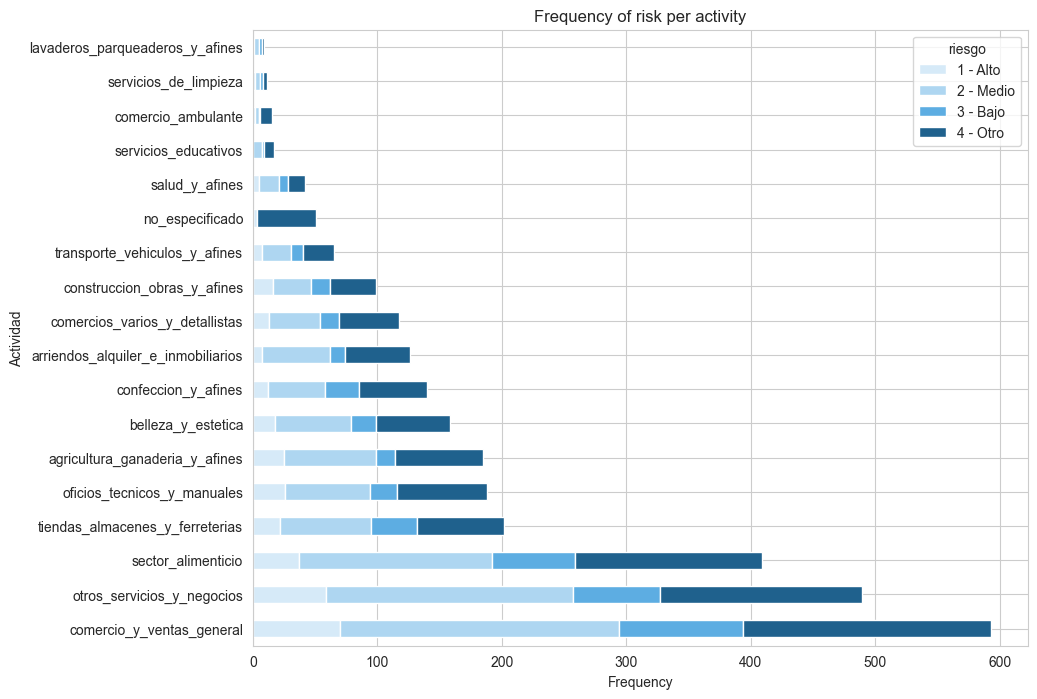

In [52]:
colors = ["#D6EAF8", "#AED6F1", "#5DADE2", "#1F618D"]
cross_tab.drop("All", axis=0).drop("All", axis=1).plot(
    kind="barh", stacked=True, figsize=(10, 8), color=colors
)
plt.title(f"Frequency of risk per activity")
plt.ylabel("Actividad")
plt.xlabel("Frequency")
plt.show()

Percentage of audit´s risk per activity:



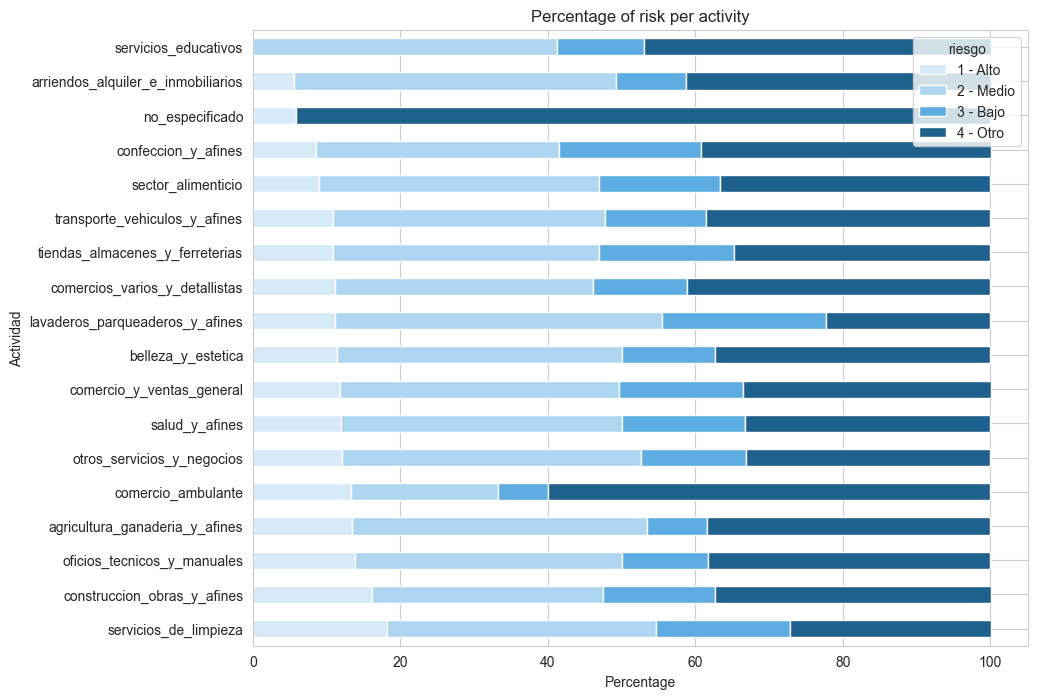

In [53]:
print("Percentage of audit´s risk per activity:\n")

cross_table = pd.crosstab(df.actividad_v2, df.riesgo, normalize="index") * 100
cross_table = cross_table.apply(lambda x: round(x, 1)).sort_values(
    by="1 - Alto", ascending=False
)
# cross_table

colors = ["#D6EAF8", "#AED6F1", "#5DADE2", "#1F618D"]
cross_table.plot(kind="barh", stacked=True, figsize=(10, 8), color=colors)
plt.title(f"Percentage of risk per activity")
plt.ylabel("Actividad")
plt.xlabel("Percentage")
plt.show()

Percentage of risk (binary) per activity:

riesgo_bin                             0     1
actividad_v2                                  
lavaderos_parqueaderos_y_afines     22.2  77.8
servicios_de_limpieza               27.3  72.7
otros_servicios_y_negocios          33.1  66.9
salud_y_afines                      33.3  66.7
comercio_y_ventas_general           33.6  66.4
tiendas_almacenes_y_ferreterias     34.7  65.3
sector_alimenticio                  36.7  63.3
belleza_y_estetica                  37.3  62.7
construccion_obras_y_afines         37.4  62.6
oficios_tecnicos_y_manuales         38.3  61.7
agricultura_ganaderia_y_afines      38.4  61.6
transporte_vehiculos_y_afines       38.5  61.5
confeccion_y_afines                 39.3  60.7
comercios_varios_y_detallistas      41.0  59.0
arriendos_alquiler_e_inmobiliarios  41.3  58.7
servicios_educativos                47.1  52.9
comercio_ambulante                  60.0  40.0
no_especificado                     94.1   5.9


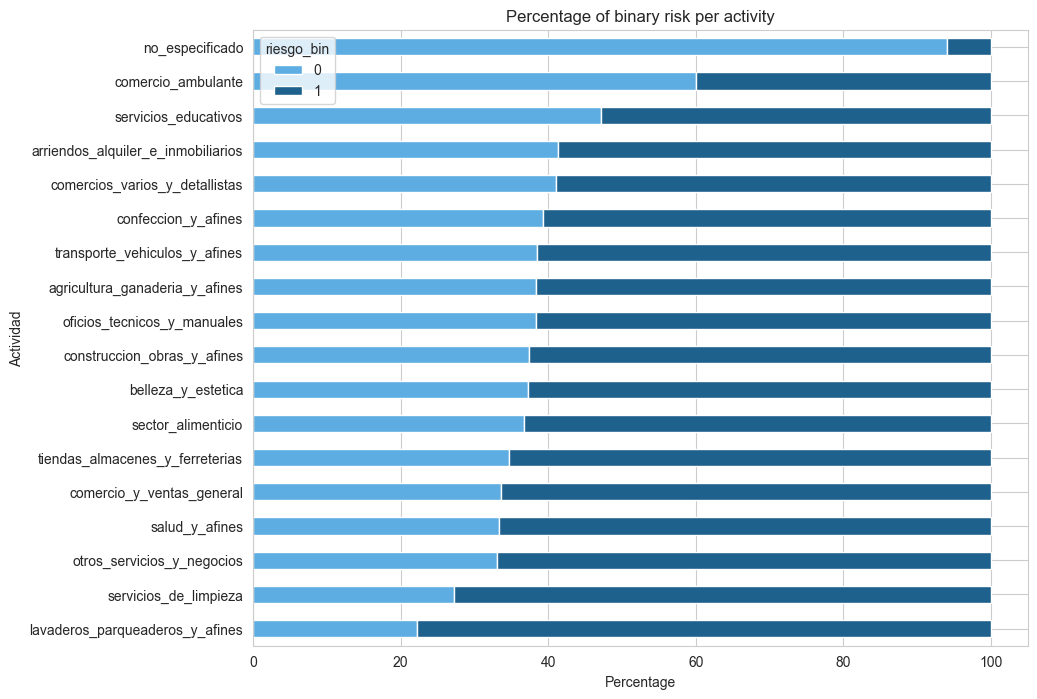

In [54]:
print("Percentage of risk (binary) per activity:\n")

cross_table = pd.crosstab(df.actividad_v2, df.riesgo_bin, normalize="index") * 100
cross_table = cross_table.apply(lambda x: round(x, 1)).sort_values(
    by=1, ascending=False
)
print(cross_table)

colors = ["#5DADE2", "#1F618D"]
cross_table.plot(kind="barh", stacked=True, figsize=(10, 8), color=colors)
plt.title(f"Percentage of binary risk per activity")
plt.ylabel("Actividad")
plt.xlabel("Percentage")
plt.show()

### chi-square test

In [55]:
chi2, p, dof, expected = chi2_contingency(
    cross_tab.drop("All", axis=0).drop("All", axis=1)
)
print(f"Chi-square: {chi2}, p-value: {p}")
if p < 0.05:
    print("There is a significant association between the activity and the risk.")
else:
    print("No significant association was found between the activity and the risk.")

Chi-square: 119.72091749164116, p-value: 1.8803444232488228e-07
There is a significant association between the activity and the risk.


--> We can observe the difference in the frequency of client activities, with a higher frequency of bank clients in commerce and food sector activities such as restaurants and food sales; on the other hand, the least frequent activities are street commerce, parking lots and cleaning services.  
We can also noticed some occupations with high proportion of risk levels.  

--> Now, we could analyze the loan amounts according to the client occupation and risk levels:


## actividad vs riesgo vs monto

Mean of monto(*10^6) per audit's risk per activity:



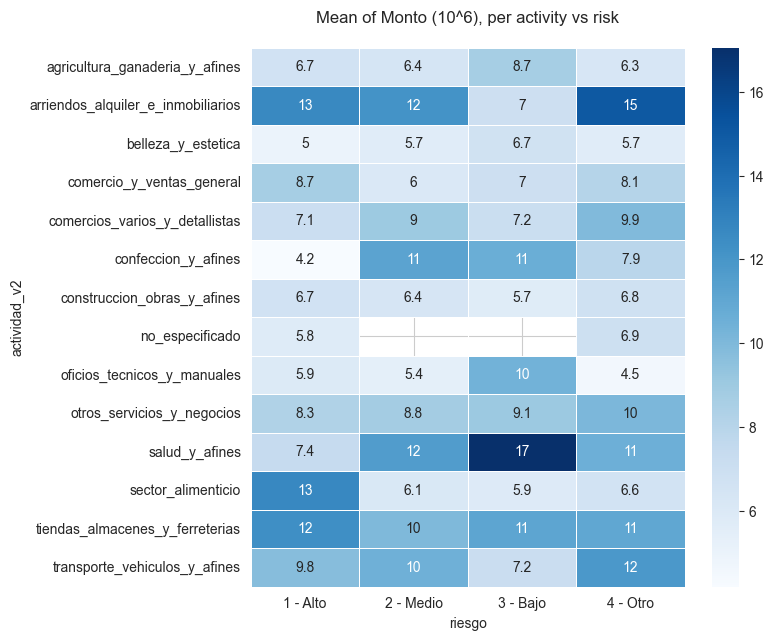

In [56]:
print("Mean of monto(*10^6) per audit's risk per activity:\n")

# Drop activities with low frequencies
activities = cross_tab.iloc[0:-4, :].drop("All", axis=0).index
temp = df[(df["actividad_v2"].isin(activities))]

# Crosstab and heatmap
monto = temp.monto.apply(lambda x: x / 1000000)
cross_table = pd.crosstab(
    temp.actividad_v2, temp.riesgo, values=monto, aggfunc="mean"
).apply(lambda x: round(x, 2))
cross_table

plt.figure(figsize=(7, 7))
sns.heatmap(cross_table, annot=True, cmap="Blues", linewidths=0.5)
plt.title("Mean of Monto (10^6), per activity vs risk\n")
plt.show()

--> In the graph above, we can analyze the relationship between activity, risk and loan amounts.  
We notice that the average loans are not equal for the different activities, being activities such as salud_y_afines, tiendas_almacenes and arriendos_alquileres those with higher average amounts.

--> Now, we will continue our analysis, comparing the risk levels against more interesting variables of the microcredits data:

## oficina vs riesgo

In [57]:
var1 = "oficina"
var2 = "riesgo"

print(df[[var1, var2]].dtypes)

cross_tab = (
    pd.crosstab(df[var1], df[var2], margins=True)
    .sort_values(by="All", ascending=False)
    .drop("All", axis=0)
)
print("\ncontingency_table:\n")
print(cross_tab.head(5))
print()
print(cross_tab.tail(5))

oficina    object
riesgo     object
dtype: object

contingency_table:

riesgo        1 - Alto  2 - Medio  3 - Bajo  4 - Otro  All
oficina                                                   
dosquebradas        41          2         0       134  177
ibague              28         16         3        80  127
fonsecca            20          5         0       100  125
tulua                9         32        28        22   91
santa rosa           0          8        22        47   77

riesgo        1 - Alto  2 - Medio  3 - Bajo  4 - Otro  All
oficina                                                   
buenaventura         2         17         0         6   25
patio bonito         1          9        15         0   25
pradera              0         23         0         1   24
soacha               3          6         5         8   22
apartado             2          6         0         6   14


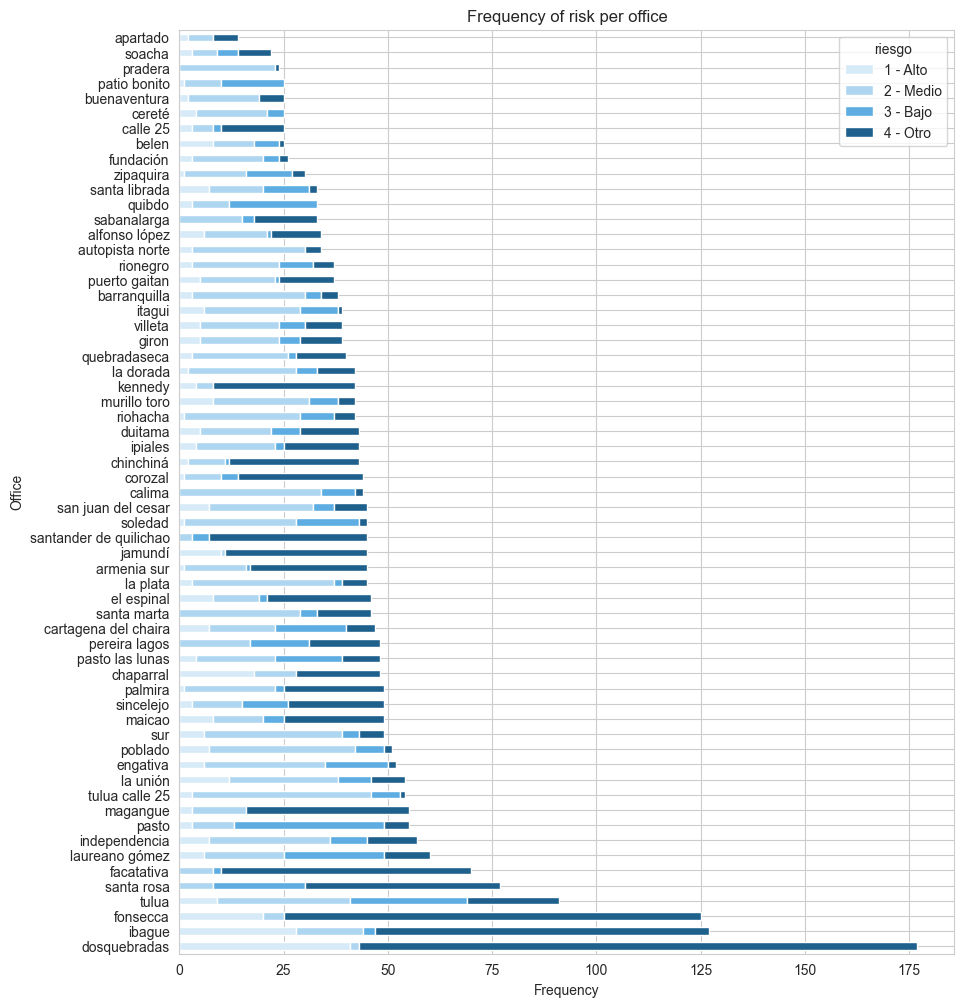

In [58]:
colors = ["#D6EAF8", "#AED6F1", "#5DADE2", "#1F618D"]

cross_tab.drop("All", axis=1).plot(
    kind="barh", stacked=True, figsize=(10, 12), color=colors
)
plt.title(f"Frequency of risk per office")
plt.ylabel("Office")
plt.xlabel("Frequency")

plt.show()

### Chi-square test

In [59]:
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f'Chi-square: {chi2}, p-value: {p}')
if p < 0.05:
    print('There is a significant association between the office & the risk of the credit.')
else:
    print('No significant association was found between the office & the risk of the credit.')

Chi-square: 1680.2623061964741, p-value: 2.8379250877986126e-214
There is a significant association between the office & the risk of the credit.


## plazo vs riesgo

<h3> Context </h3>

We use "riesgo" (risk level) as the target variable because it represents the credit risk classification, which is crucial for decision-making in financial analysis. The variable "plazo" (loan term) is analyzed because it reflects the repayment period chosen by borrowers, helping us understand how loan duration correlates with risk levels, especially for outlier loan amounts.

In [60]:
df[['riesgo_int','plazo']].dtypes

riesgo_int    int64
plazo         int64
dtype: object

In [61]:
df['riesgo_int'].value_counts()

riesgo_int
4    1084
2    1084
3     423
1     325
Name: count, dtype: int64

In [62]:
df['riesgo_int'].corr(df['plazo'])

np.float64(-0.004585643213895014)

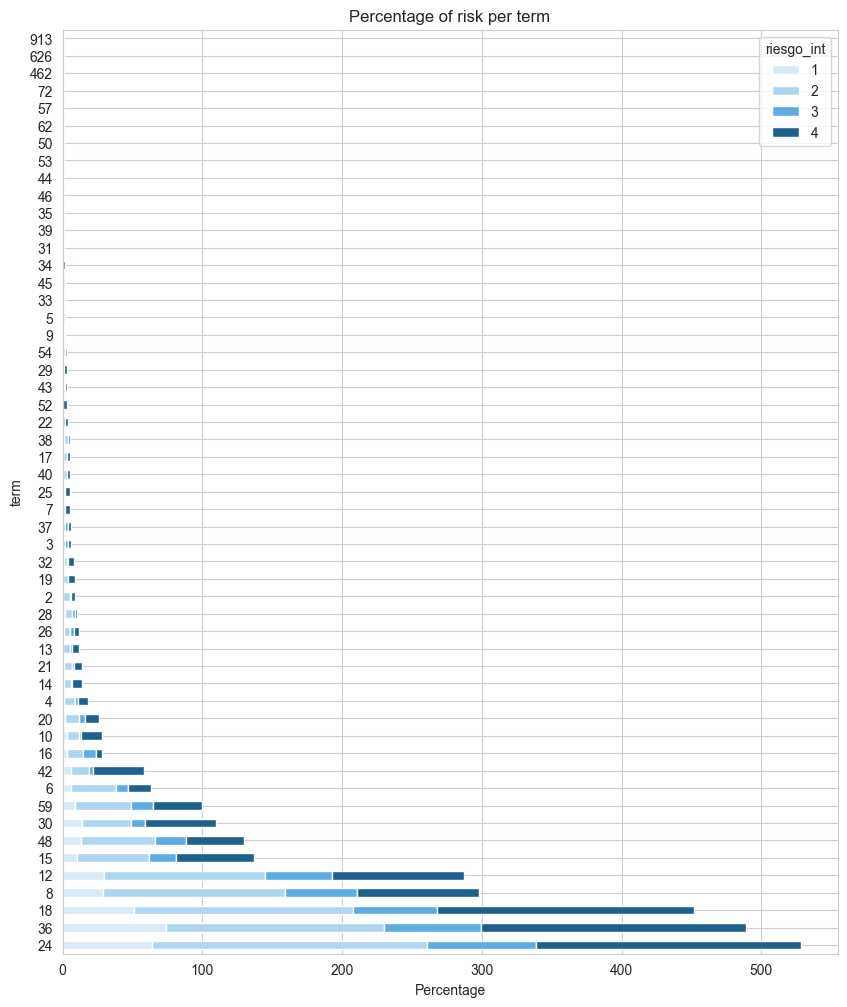

In [63]:
cross_tab = pd.crosstab(df.plazo, df.riesgo_int, margins=True).sort_values(
    by="All", ascending=False).drop("All",axis=0)

colors = ["#D6EAF8", "#AED6F1", "#5DADE2", "#1F618D"]

cross_tab.drop("All",axis=1).plot(kind="barh", stacked=True, figsize=(10, 12), color=colors)
plt.title(f"Percentage of risk per term")
plt.ylabel("term")
plt.xlabel("Percentage")
plt.show()

### Correlation Analysis with/without Outliers

In [64]:
Q1 = np.percentile(df.monto, 25)  # Q1 (25%)
Q3 = np.percentile(df.monto, 75)  # Q3 (75%)
IQR = Q3 - Q1  # IQR

# Limits for outliers
lower_limit = Q1 - 1.5 * IQR
lower_limit = 0 if lower_limit<0 else lower_limit
upper_limit = Q3 + 1.5 * IQR

In [65]:
df_without_outliers = df[(df.monto >= lower_limit) & (df.monto <= upper_limit)]
df_with_outliers = df[(df.monto < lower_limit) | (df.monto > upper_limit)]

In [66]:
df_with_outliers['riesgo_int'].corr(df_with_outliers['plazo'])

np.float64(0.002006791722857251)

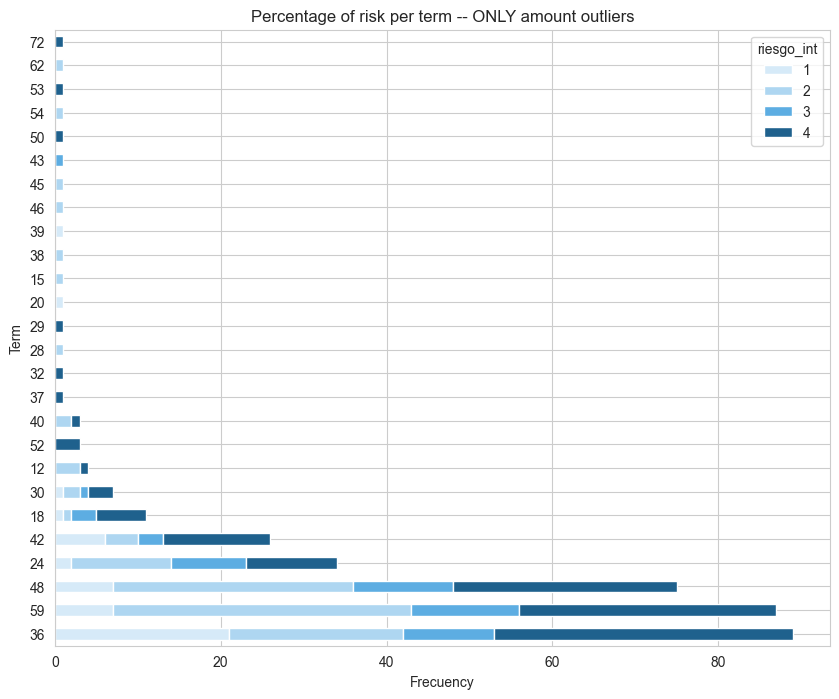

In [67]:
cross_tab = pd.crosstab(df_with_outliers.plazo, df_with_outliers.riesgo_int, margins=True).sort_values(
    by="All", ascending=False).drop("All",axis=0).drop("All",axis=1)

colors = ["#D6EAF8", "#AED6F1", "#5DADE2", "#1F618D"]
cross_tab.plot(kind="barh", stacked=True, figsize=(10, 8), color=colors)
plt.title(f"Percentage of risk per term -- ONLY amount outliers")
plt.ylabel("Term")
plt.xlabel("Frecuency")
plt.show()

In [68]:
df_without_outliers['riesgo_int'].corr(df_without_outliers['plazo'])

np.float64(-0.007179839774698406)

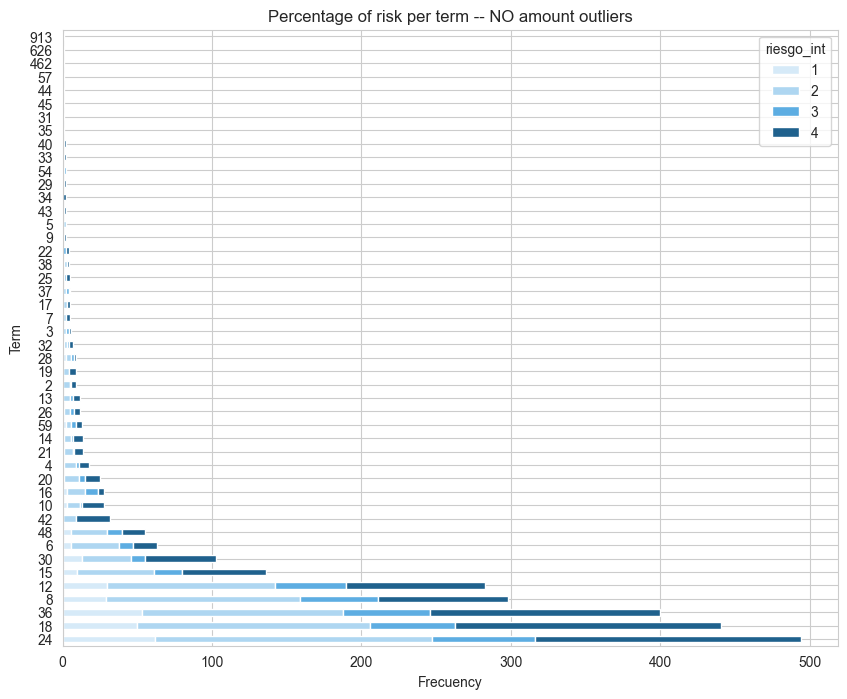

In [69]:
cross_tab = pd.crosstab(df_without_outliers.plazo, df_without_outliers.riesgo_int,margins=True).sort_values(
    by="All", ascending=False).drop("All",axis=0).drop("All",axis=1)

colors = ["#D6EAF8", "#AED6F1", "#5DADE2", "#1F618D"]
cross_tab.plot(kind="barh", stacked=True, figsize=(10, 8), color=colors)
plt.title(f"Percentage of risk per term -- NO amount outliers")
plt.ylabel("Term")
plt.xlabel("Frecuency")
plt.show()

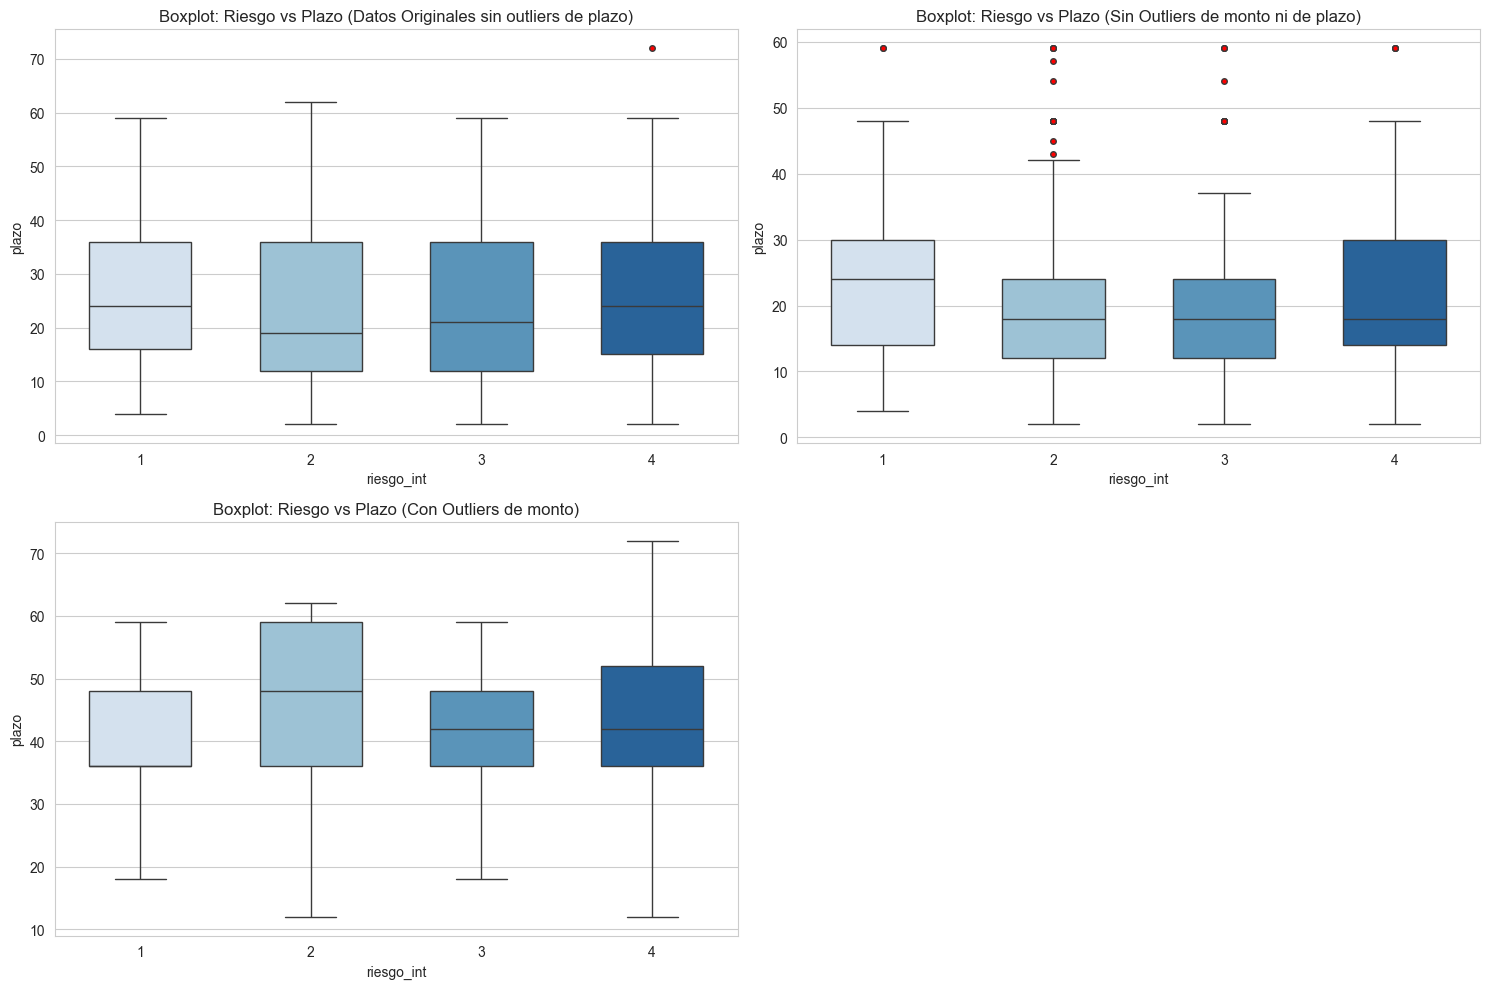

In [70]:
# Boxplots to compare
plt.figure(figsize=(15, 10))


temp = df[df["plazo"]<400]

plt.subplot(2, 2, 1)
sns.boxplot(
    x=temp["riesgo_int"],
    y=temp["plazo"],
    palette="Blues",
    linewidth=1,
    width=0.6,
    flierprops=dict(marker="o", markerfacecolor="red", markersize=4),
)
plt.title("Boxplot: Riesgo vs Plazo (Datos Originales sin outliers de plazo)")


temp = df_without_outliers[df_without_outliers["plazo"]<400]
plt.subplot(2, 2, 2)
sns.boxplot(
    x=temp["riesgo_int"],
    y=temp["plazo"],
    palette="Blues",
    linewidth=1,
    width=0.6,
    flierprops=dict(marker="o", markerfacecolor="red", markersize=4),
)
plt.title("Boxplot: Riesgo vs Plazo (Sin Outliers de monto ni de plazo)")


plt.subplot(2, 2, 3)
sns.boxplot(
    x=df_with_outliers["riesgo_int"],
    y=df_with_outliers["plazo"],
    palette="Blues",
    linewidth=1,
    width=0.6,
    flierprops=dict(marker="o", markerfacecolor="red", markersize=4),
)
plt.title("Boxplot: Riesgo vs Plazo (Con Outliers de monto)")

plt.tight_layout()
plt.show()

In [71]:
freq_riesgo_3_with_outliers = ((df_with_outliers.riesgo_int == 3) | (df_with_outliers.riesgo_int == 4)).sum()
freq_riesgo_3_without_outliers = ((df_without_outliers.riesgo_int == 3) | (df_without_outliers.riesgo_int == 4)).sum()
prop_riesgo_3_with_outliers = freq_riesgo_3_with_outliers / len(df_with_outliers)
prop_riesgo_3_without_outliers = freq_riesgo_3_without_outliers / len(df_without_outliers)


print(f"Frequency of risks level  3 or 4 with outliers: {freq_riesgo_3_with_outliers} ({prop_riesgo_3_with_outliers:.2%})")
print(f"Frequency of risks level  3 or 4 without outliers: {freq_riesgo_3_without_outliers} ({prop_riesgo_3_without_outliers:.2%})")

Frequency of risks level  3 or 4 with outliers: 191 (53.80%)
Frequency of risks level  3 or 4 without outliers: 1316 (51.39%)


--> We notice the variety of loan terms in the data and several loan terms that could be typos/outliers.

## **analistas vs riesgo**

#### **Context**
In this part, we will analyze the relationship between **loan analysts** and **credit risk** in the microcredit portfolio of Bank W. The objective is to determine whether certain analysts have a higher tendency to approve high-risk loans, which could impact the bank's overall risk exposure.

In [72]:
# Revisión de los datos

# Verificar si hay valores nulos en las columnas de interés
print(df[['analista', 'riesgo_int']].isnull().sum())
print()
# Contar cuántos analistas distintos hay en la base de datos
print(f"Número de analistas distintos: {df['analista'].nunique()}")
print()
# Ver la distribución de los niveles de riesgo
print(df['riesgo_int'].value_counts())

analista      0
riesgo_int    0
dtype: int64

Número de analistas distintos: 386

riesgo_int
4    1084
2    1084
3     423
1     325
Name: count, dtype: int64


## Does the risk depend on the analyst?

## Are there analysts who consistently approve more high risk crdits than others?

In [73]:
# Crear una tabla de contingencia de analistas vs. niveles de riesgo
tabla_riesgo_por_analista = (
    pd.crosstab(df["analista"], df["riesgo_int"], margins=True)
    .sort_values(by="All", ascending=False)
    .drop("All", axis=0)
    .drop("All", axis=1)
)

# Mostrar la tabla generada
print(tabla_riesgo_por_analista)

riesgo_int   1  2  3   4
analista                
IOC          6  2  0  35
GEE         21  0  0  22
FPN          0  1  2  26
IKS          1  1  0  24
IKO          9  0  0  16
...         .. .. ..  ..
KAN          0  0  1   0
LSR          0  0  0   1
LVL          0  0  0   1
KXP          0  0  0   1
MTM          0  1  0   0

[386 rows x 4 columns]


In [74]:
# Crear una nueva columna en la tabla con la suma de los otros niveles de riesgo (2, 3, 4)
tabla_riesgo_por_analista['Total_Otros_Riesgos'] = tabla_riesgo_por_analista[2] + tabla_riesgo_por_analista[3] + tabla_riesgo_por_analista[4]

# Filtrar los analistas que aprueban más créditos de riesgo alto (1) que los otros niveles combinados
analistas_riesgo_alto = tabla_riesgo_por_analista[tabla_riesgo_por_analista[1] > tabla_riesgo_por_analista['Total_Otros_Riesgos']]

# Mostrar los analistas que cumplen la condición
print("Analysts approving more high-risk credits than the sum of the other risk levels:\n")
print(analistas_riesgo_alto)

Analysts approving more high-risk credits than the sum of the other risk levels:

riesgo_int   1  2  3  4  Total_Otros_Riesgos
analista                                    
JKR         13  0  0  7                    7
KVN          8  1  0  2                    3
CJN          6  2  0  3                    5
MFQ          6  0  0  1                    1
ISV          3  0  0  2                    2
LRG          3  0  0  2                    2
ISY          3  0  0  1                    1
FFW          4  0  0  0                    0
IQB          2  1  0  0                    1
AIZ          2  0  0  1                    1
LQL          2  0  0  1                    1
EDN          2  0  0  0                    0
KLR          2  0  0  0                    0
IZS          1  0  0  0                    0
FYJ          1  0  0  0                    0


<Figure size 1200x600 with 0 Axes>

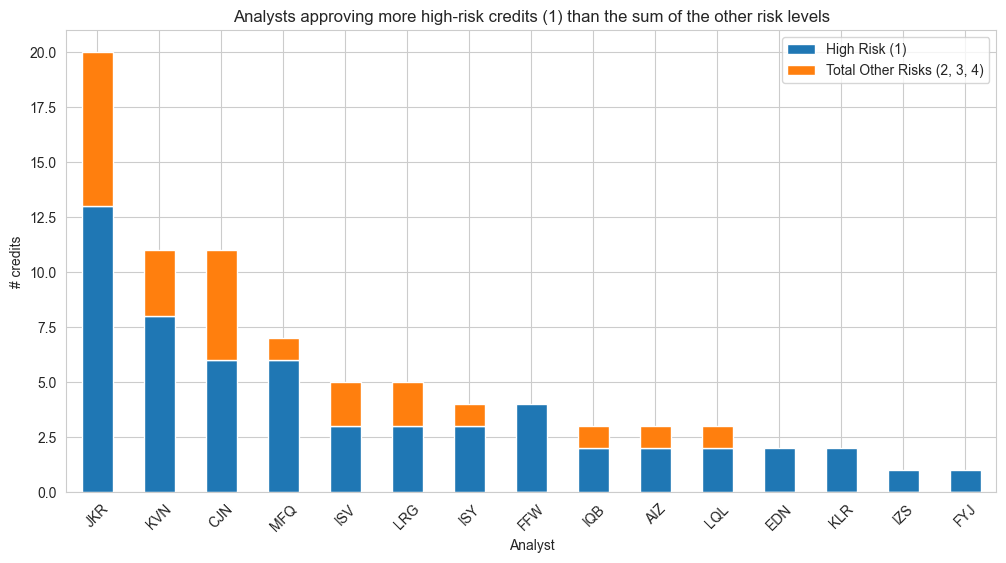

In [75]:
# Gráfico de los analistas que aprueban más créditos de riesgo alto
plt.figure(figsize=(12,6))
analistas_riesgo_alto[[1, 'Total_Otros_Riesgos']].plot(kind='bar', figsize=(12,6), stacked=True)
plt.xlabel("Analyst")
plt.ylabel("# credits")
plt.title("Analysts approving more high-risk credits (1) than the sum of the other risk levels")
plt.legend(["High Risk (1)", "Total Other Risks (2, 3, 4)"])
plt.xticks(rotation=45)
plt.show()

In [76]:
import pandas as pd

# Contar el total de créditos aprobados por cada analista
total_creditos = df.groupby('analista').size()

# Contar cuántos créditos de cada analista fueron clasificados como "riesgo alto" (riesgo = 1)
creditos_alto_riesgo = df[df['riesgo_int'] == 1].groupby('analista').size()

# Calcular la tasa de alto riesgo por analista (si no tiene créditos de alto riesgo, se pone 0)
tasa_riesgo_alto = (creditos_alto_riesgo / total_creditos).fillna(0)

# Convertir en DataFrame para visualizar mejor
df_tasa_riesgo = tasa_riesgo_alto.reset_index()
df_tasa_riesgo.columns = ['analista', 'tasa_riesgo_alto']

print("Analysts with the highest proportion of high-risk loans:")
df_tasa_riesgo.sort_values(by='tasa_riesgo_alto', ascending=False).head(10)


Analysts with the highest proportion of high-risk loans:


,analista,tasa_riesgo_alto
296,KLR,1.000000
90,EDN,1.000000
229,IZS,1.000000
109,FFW,1.000000
120,FYJ,1.000000
347,MFQ,0.857143
215,ISY,0.750000
308,KVN,0.727273
329,LQL,0.666667
3,AIZ,0.666667


In [77]:
# Definir umbrales para clasificar a los analistas según su tasa de alto riesgo
def clasificar_analista(tasa):
    if tasa >= 0.5:  # Más del 30% de sus créditos son de alto riesgo
        return 'Analista de Riesgo Alto'
    elif tasa >= 0.2:  # Entre 10% y 30% de sus créditos son de alto riesgo
        return 'Analista de Riesgo Medio'
    else:  # Menos del 10% de sus créditos son de alto riesgo
        return 'Analista de Bajo Riesgo'

# Aplicar la clasificación
df_tasa_riesgo['categoria_riesgo'] = df_tasa_riesgo['tasa_riesgo_alto'].apply(clasificar_analista)

print("Distribution of analysts in each category:\n")
print(df_tasa_riesgo['categoria_riesgo'].value_counts())


Distribution of analysts in each category:

categoria_riesgo
Analista de Bajo Riesgo     300
Analista de Riesgo Medio     61
Analista de Riesgo Alto      25
Name: count, dtype: int64


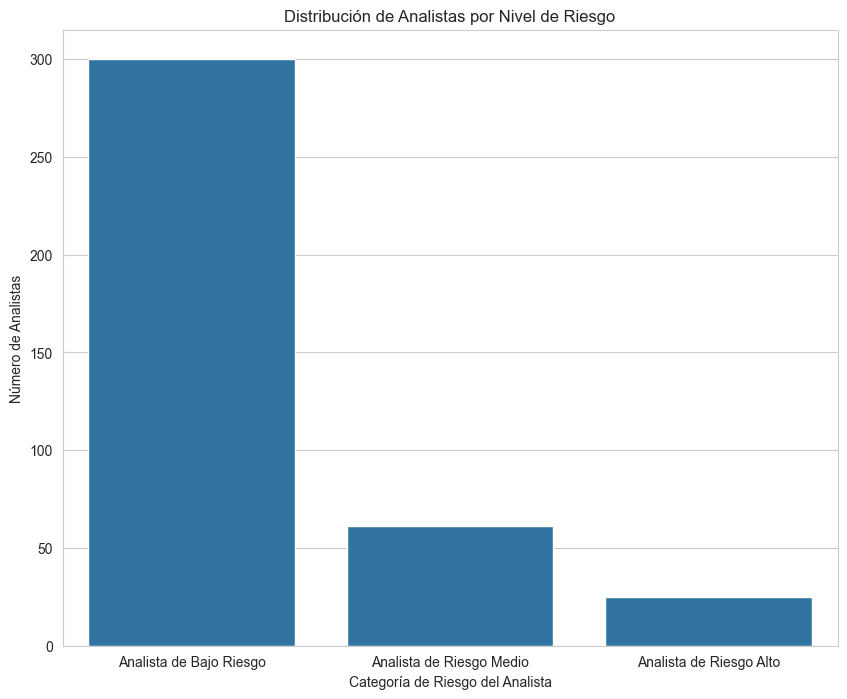

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo de los gráficos
sns.set_style("whitegrid")

### 📊 Gráfico de Barras: Distribución de Analistas por Categoría de Riesgo
plt.figure(figsize=(10,8))
sns.countplot(data=df_tasa_riesgo, x='categoria_riesgo', order=['Analista de Bajo Riesgo', 'Analista de Riesgo Medio', 'Analista de Riesgo Alto'])
plt.xlabel("Categoría de Riesgo del Analista")
plt.ylabel("Número de Analistas")
plt.title("Distribución de Analistas por Nivel de Riesgo")
plt.show()

In [79]:
#Prueba Chi-Cuadrado para revisar si hay una relación significativa entre "analista" y "riesgo"

from scipy.stats import chi2_contingency

# Crear la tabla de contingencia: cruza los analistas con el nivel de riesgo
tabla_contingencia = pd.crosstab(df['analista'], df['riesgo_int'])

# Aplicar la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# Mostrar resultados
print(f"Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")

# Interpretación del valor p
if p < 0.05:
    print("Existe una relación significativa entre el analista y el nivel de riesgo de los créditos.")
else:
    print("No hay evidencia estadística de una relación significativa entre el analista y el nivel de riesgo de los créditos.")

Chi-cuadrado: 2905.3905312948855
Valor p: 2.0217889982374316e-151
Grados de libertad: 1155
Existe una relación significativa entre el analista y el nivel de riesgo de los créditos.


In [80]:
#Usamos Cramer´s V para medir la fuerza de la relación.

# Calcular Cramer's V
n = np.sum(tabla_contingencia.values)  # Total de observaciones
cramer_v = np.sqrt(chi2 / (n * (min(tabla_contingencia.shape) - 1)))

print(f"Cramer's V: {cramer_v}")

if cramer_v < 0.1:
    print("La relación entre analista y riesgo es muy débil.")
elif cramer_v < 0.3:
    print("La relación entre analista y riesgo es moderada.")
else:
    print("La relación entre analista y riesgo es fuerte.")

Cramer's V: 0.5762990069534307
La relación entre analista y riesgo es fuerte.


# CONCLUSIONS

## **Key Findings Per Analysis**

### 1. plazo vs. riesgo
After conducting various statistical and visual analyses, it was determined that the **loan term is not a determining factor** in the risk level of microloans.

 **Correlation Analysis**  
   - The correlation coefficient obtained is **extremely low** (≈ 0.004), indicating **an almost nonexistent relationship** between the loan term and the associated risk.  

 **Contingency Tables**  
   - The distribution of risk levels across different loan terms **does not show a significant pattern**, suggesting that the term **does not directly influence risk classification**.  

 **Comparative Boxplots**  
   - Boxplots did not reveal clear differences in risk distribution based on loan term.  
   - Even after removing outliers, the trend remains the same, reinforcing the idea that the loan term does not significantly impact risk level.

### 2. monto vs. riesgo
We can notice some differences in the distribution of the microcredit amount by risk level when using only the data without outliers and when using the data with only outliers.  
This indicates that there is a possible difference in the relationship between the two variables in the two sets of observations.  
There is the possibility of creating different models according to the limit amount to capture this pattern.

### 3. oficina vs. riesgo
Some branches disproportionately classify clients into specific risk categories, possibly due to internal credit policies, local economic conditions, or regional client profiles.
This raises concerns about whether these differences are based on objective financial factors or inconsistent evaluation criteria, potentially leading to biases in credit allocation.
To ensure fair and data-driven credit decisions, it is necessary to incorporate additional variables like loan amounts, repayment history, and macroeconomic indicators.

### 4. analistas vs. riesgo
Some analysts systematically approve more high-risk loans, indicating non-random risk assignment.
The Chi-Square test confirms significant differences in risk distribution among analysts.
Understanding the factors influencing analyst decisions can enhance credit evaluation strategies.

A strong relationship exists between analysts and the risk levels of approved loans.
Some analysts consistently approve high-risk loans at higher rates.
Decision-making may be influenced by factors beyond objective creditworthiness.

### 5. actividad vs. riesgo
Regarding the conclusions on the relationship between risk and activity:    
- We can notice that the proportion of risky credits is not the same for all activities. There are activities with a higher percentage of risk compared to the others.
- The activities that apparently have a higher proportion of risky loans are: Vehicle services, such as car washes and parking, cleaning services, health services such as drugstores.
- The activities with the lowest apparent risk are street commerce, educational services such as teachers, and leasing or rentals.
- We can say with 95% confidence that there is a link between risk and the credit client's activity.


## **Impact of the relationships**

### 1. plazo vs. riesgo
After doing correlation and analysis, we have seen that the relationship in not important for the analysis.

### 2. monto vs. riesgo
The relationship between microcredit amount and microcredit risk depends on the data set being analyzed, data without amount outliers and data with only amount outliers. When we analyze the relationship using all the data without filtering outliers, we notice that a relationship is not very clear. The impact of this relationship is slight, but it adds information to the model if it were to be used by splitting the data set.

### 3. oficina vs. riesgo
The significant relationship between branch offices and risk classification suggests that credit risk assessments are influenced not only by client-specific factors but also by institutional and regional differences. This could lead to disparities in credit accessibility and financial inclusion.
If certain offices are consistently assigning clients to higher risk categories, it may result in increased interest rates or loan denials for individuals who might otherwise qualify under different assessment criteria.

### 4. analistas vs. riesgo
Higher Defaults: Analysts with a higher tendency for risky approvals may increase financial losses.
Regulatory Risks: Disproportionate risk allocation could raise compliance concerns.
Strategic Adjustments: Standardizing risk assessment and implementing oversight mechanisms could mitigate inconsistencies.

### 5. actividad vs. riesgo
We can see that both graphically and statistically, the client's occupation has an important and significant relationship with microcredit risk. There are occupations that are more likely to have higher risk and others with lower risk. This relationship can be helpful for the performance of the model.

## **Hypothesis and next steps**

### 1. plazo vs riesgo
High loan amounts do not have unusually long or short terms, which suggests that **loan term might be a key factor to consider in microcredit risk analysis**. This could indicate that borrowers taking larger loans tend to choose standard repayment periods, potentially revealing a pattern in responsible borrowing behavior or lender policies.  
On the other hand, in order to improve the performance of future machine learning models, we could categorize or group the loan term variable, in order to have fewer levels of this variable.

### 2. monto vs. riesgo
It would be of interest to perform multivariate analyses, in which we can describe the amount of loans based on two other variables, for example, the average of the amounts, by risk level vs. occupancy, or the median of the amounts, by risk level vs. offices. Additionally, we should perform analyses where we separate the data set depending on the amount outliers. This type of analysis can provide us with more information on loan behavior and risk trends.

### 3. oficina vs. riesgo
Conduct a deeper investigation to determine whether differences in risk classification are justified or indicate systematic biases.
Implement predictive modeling and machine learning techniques to identify which office-specific factors contribute most to risk assessment.
Use data-driven approaches to create more transparent and standardized credit evaluation frameworks, minimizing inconsistencies across branches.

### 4. analistas vs. riesgo
Analyst behavior may be influenced by subjective judgment or external pressures.
The variation in approvals could be linked to branch location, loan type, or economic conditions.
Next Steps: Conduct multivariate analysis, assess analyst behavior, and develop predictive models for risk assessment.

### 5. actividad vs. riesgo
We noticed activities with a high proportion of risky loans, in this set of activities we could perform more analysis where we analyze the offices where these loans are granted, the amounts and even the installments of the loans.
On the other hand, we noticed that the occupation with the lowest risk level is "no_especificado", it means, that the client or audit team could identify the client occupation. It might be of interest to make further analysis in this subset of microcredits in order to find patters or valuable information.
